In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np #importing required libraries

In [89]:
from sklearn.datasets import fetch_california_housing     #loading California housing dataset
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
california = fetch_california_housing()


In [90]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [91]:
print(f'  Data shape = {california.data.shape}')
print(f'Target shape = {california.target.shape}')

  Data shape = (20640, 8)
Target shape = (20640,)


In [92]:
california_data = pd.DataFrame(california.data, columns=california.feature_names)
california_data['MedHouseValue'] = pd.Series(california.target)

max(california_data['MedHouseValue'])

5.00001

In [93]:
pd.set_option('precision', 4)
#pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [94]:
california_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


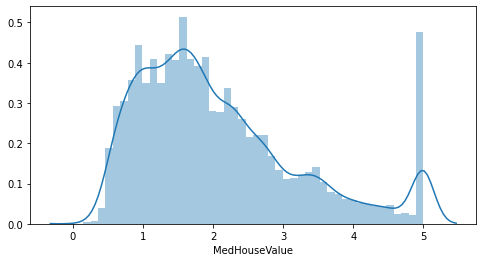

In [95]:
plt.figure(figsize=(8,4))
sns.distplot(california_data['MedHouseValue'])

In [96]:
california_data.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

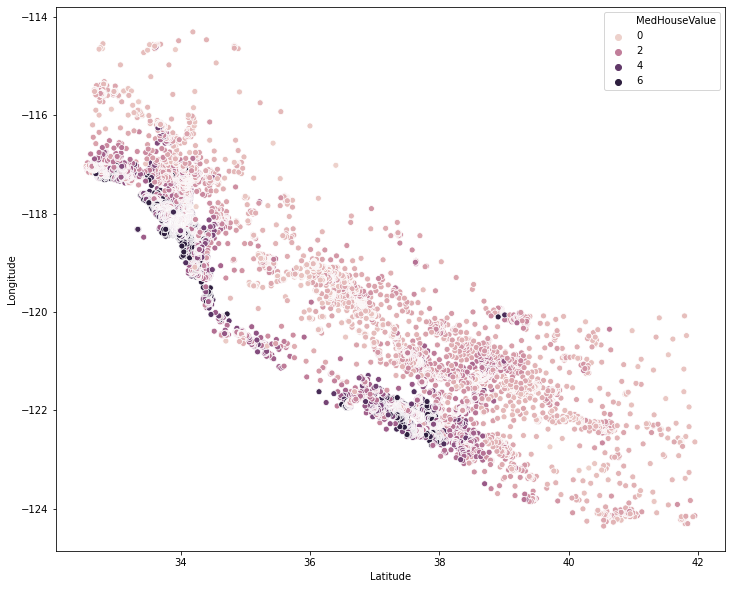

In [97]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Latitude', y='Longitude' ,data=california_data,hue='MedHouseValue')

In [98]:
california_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.0000,-0.1190,0.3269,-0.0620,0.0048,0.0188,-0.0798,-0.0152,0.6881
HouseAge,-0.1190,1.0000,-0.1533,-0.0777,-0.2962,0.0132,0.0112,-0.1082,0.1056
AveRooms,0.3269,-0.1533,1.0000,0.8476,-0.0722,-0.0049,0.1064,-0.0275,0.1519
AveBedrms,-0.0620,-0.0777,0.8476,1.0000,-0.0662,-0.0062,0.0697,0.0133,-0.0467
Population,0.0048,-0.2962,-0.0722,-0.0662,1.0000,0.0699,-0.1088,0.0998,-0.0246
AveOccup,0.0188,0.0132,-0.0049,-0.0062,0.0699,1.0000,0.0024,0.0025,-0.0237
Latitude,-0.0798,0.0112,0.1064,0.0697,-0.1088,0.0024,1.0000,-0.9247,-0.1442
Longitude,-0.0152,-0.1082,-0.0275,0.0133,0.0998,0.0025,-0.9247,1.0000,-0.0460
MedHouseValue,0.6881,0.1056,0.1519,-0.0467,-0.0246,-0.0237,-0.1442,-0.0460,1.0000


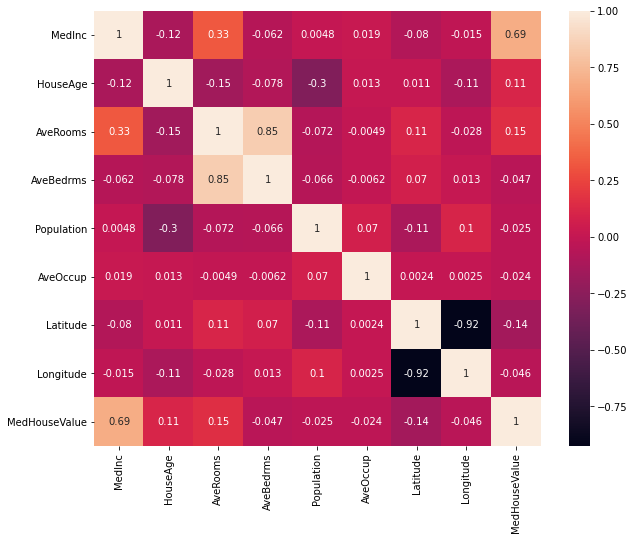

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(california_data.corr(), annot=True)

In [100]:
X = california_data.drop('MedHouseValue',axis=1)
y = california_data['MedHouseValue']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=30, callbacks=[early_stop])

Epoch 1/30
129/129 [==============================] - 0s 3ms/step - loss: 6.4324 - val_loss: 1.7966
Epoch 2/30
129/129 [==============================] - 0s 2ms/step - loss: 3.6891 - val_loss: 1.9272
Epoch 3/30
129/129 [==============================] - 0s 2ms/step - loss: 3.0947 - val_loss: 1.7860
Epoch 4/30
129/129 [==============================] - 0s 2ms/step - loss: 2.6361 - val_loss: 1.7099
Epoch 5/30
129/129 [==============================] - 0s 2ms/step - loss: 2.4212 - val_loss: 1.6714
Epoch 6/30
129/129 [==============================] - 0s 2ms/step - loss: 2.1764 - val_loss: 1.5143
Epoch 7/30
129/129 [==============================] - 0s 2ms/step - loss: 2.0321 - val_loss: 1.4509
Epoch 8/30
129/129 [==============================] - 0s 2ms/step - loss: 1.8898 - val_loss: 1.3952
Epoch 9/30
129/129 [==============================] - 0s 2ms/step - loss: 1.7806 - val_loss: 1.3841
Epoch 10/30
129/129 [==============================] - 0s 2ms/step - loss: 1.6996 - val_loss: 1.3585

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)


0.8411940460437952

In [106]:
np.sqrt(mean_squared_error(y_test,predictions))

1.0716936106539252

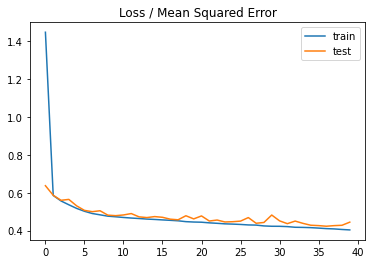

In [107]:
import matplotlib.pyplot as pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

predict = model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)
print("Predictions for test housing prices is: {}".format(predictions))


Predictions for test housing prices is: [[1.9817162]
 [1.9817162]
 [2.1785462]
 ...
 [2.3713408]
 [1.9817162]
 [1.9817162]]


In [109]:
np.sqrt(mean_squared_error(y_test,predictions))
print("Mean squared error between test_labels and predictions is: {}".format(mean_squared_error(y_test, predict)))

Mean squared error between test_labels and predictions is: 1.148527195116447
